In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [3]:
tips = sns.load_dataset("tips")  
tips.tail(1)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


******************************************

## 분석을 시작하기 앞서 연속값을 가지는 컬럼들의 분포를 살펴보자

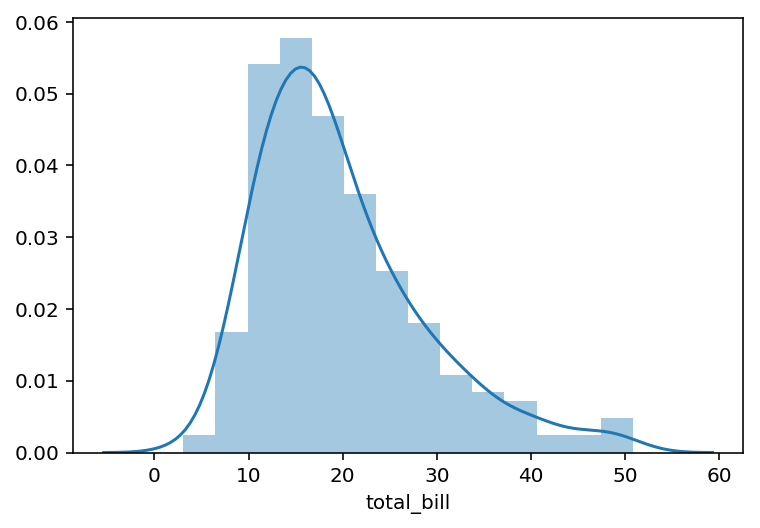

In [34]:
sns.distplot(tips.total_bill, kde= True)

## 알 수 있는 것
 * 사람들이 10 ~ 20불 사이에서 식사를 즐김
 * 고급 레스토랑이라기 보단 두세명이서 가볍게 즐기는 식당같다
 * 10 ~ 20불을 낸 사람들 사이에서 팁을 준 사람들이 많을 확률이 높다
 * ### total_bill로 매출액을 어느정도 짐작할 수 있을 듯

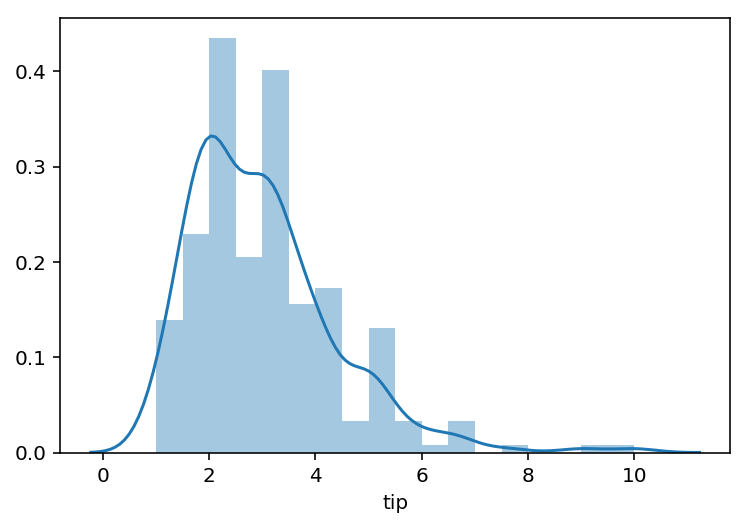

In [33]:
sns.distplot(tips.tip)

## 알 수 있는 것
 * 사람들이 2 ~ 4불 사이에서 팁을 많이 줌
 * 팁이 적은 걸로 보아 고객들이 돈이 많은 것 같진 않다 (팁을 원래 짜게 주는 문화라면 상관없지만)

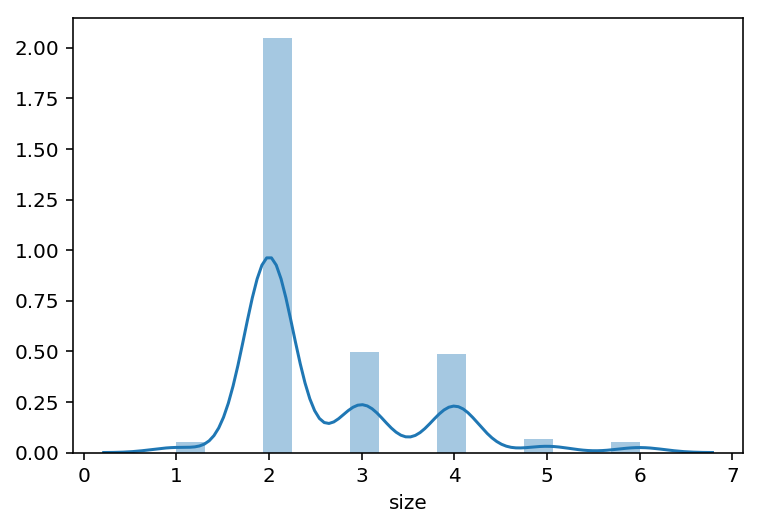

In [37]:
sns.distplot(tips['size'])

## 알 수 있는 것
 * formal한 자리보단 보단 연인, 친구끼리 와서 가볍게 즐기는 식당이다
 * 가끔 회식하러 오는 듯

# 여기까지 정리
   > #### 우리가 분석할 식당은 2 ~ 3명의 사람들이 가볍게 즐기는 식당이다 (확률이 높다)

-----------------------

#### 각 컬럼끼리 비교해서 전체적인 추이를 살펴보자
#### 그 중 유의미한 애들만 추려서 가설검정을 하자

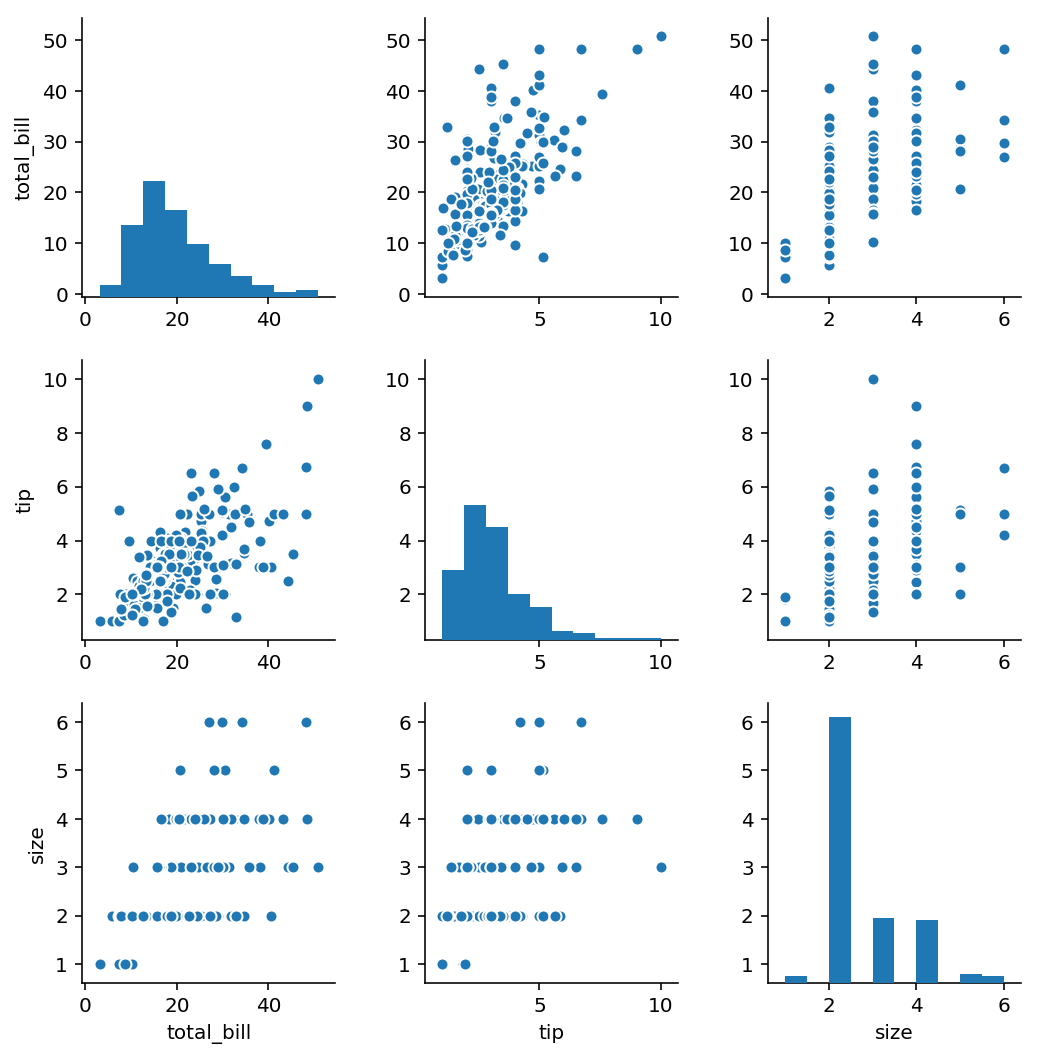

In [38]:
sns.pairplot(tips)

#### 팁에 영향을 주는 컬럼들은 total_bill과 size인 걸 확인할 수 있다
#### 그럼 어느 feature가 tip에 더 영향을 많이 줄까?
# * 가설
   > ### 1. total_bill이 tip에 영향을 많이 준다
   > ### 2. size가 tip에 영향을 많이 준다
   
   
# * 분석방법
   > 두 변수간 상관관계를 수치적으로 나타낸 __pearson correlation__을 구해서 비교

In [52]:
total_bill = tips['total_bill']
tip = tips['tip']
size = tips['size']

# 1. total_bill이 tip에 영향을 많이 준다
one = total_bill.corr(tip)

# 2. size가 tip에 영향을 많이 준다
two = size.corr(tip)

one, two

(0.67573410921136412, 0.48929877523035775)

## 확인 결과 total_bill이 size보다 tip과 상관관계가 높음을 알 수 있다
#### (이 말은 몇 명이 아닌 뭘 먹었느냐, 즉 비싼 걸 먹은 고객일수록 팁을 많이 줄 확률이 높다는 걸 뜻함)

# 여기까지 정리
   > #### 우리가 분석할 식당은 2 ~ 3명의 사람들이 가볍게 즐기는 식당이다 (확률이 높다)
   > ### 그리고 tip은 size보다 total_bill과 상관관계가 높다

------------------------------

####  결제금액과 팁의 관계를 살펴봤다
#### 그럼 성별에 따라서도 팁이 다를 수 있을까?

# * 가설
   > ### 1. 성별에 따라 팁이 다를 것이다
#### (단, 현재 다루는 데이터에서 성별(sex)는 계산한 사람의 성별을 뜻하므로 이를 감안해서 보자)

# * 분석방법
   > 성별을 기준으로 데이터를 나눈 후 pd.DataFrame.describe로 각 평균을 살핀다

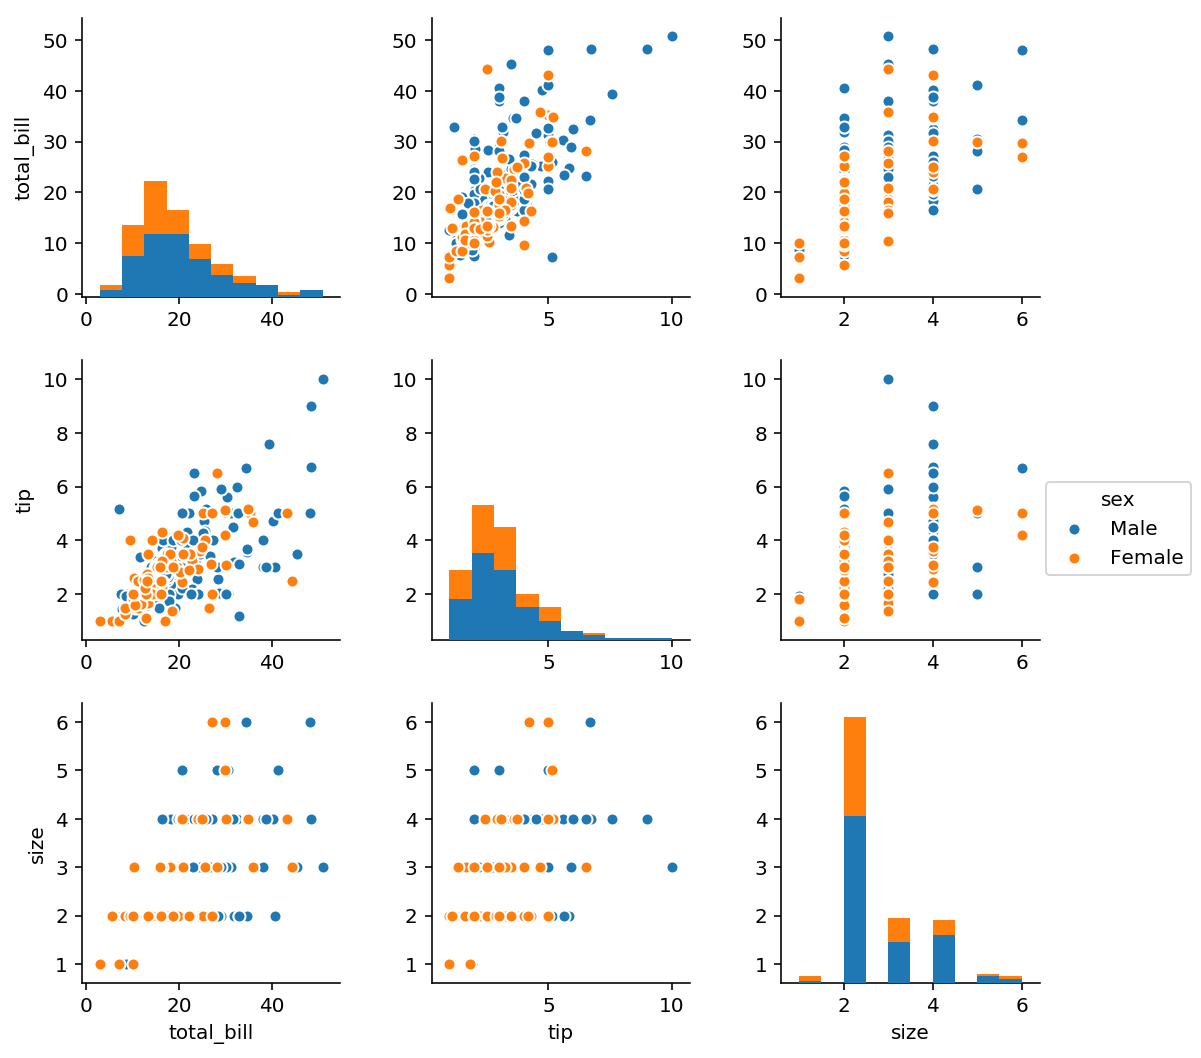

In [66]:
sns.pairplot(tips, hue='sex')
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

In [67]:
male.describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [68]:
female.describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


#### mean에 주목하면 성별에 따라 tip의 평균이 0.2달러 정도 차이가 난다
#### 성별에 따라 다르긴 하지만 그 차이가 괄목할 만한 수준은 아닌 것 같다

# 여기까지 정리
   > #### 우리가 분석할 식당은 2 ~ 3명의 사람들이 가볍게 즐기는 식당이다 (확률이 높다)
   > #### 그리고 tip은 size보다 total_bill과 상관관계가 높다
   > ### 남성고객들이 팁을 조금 더 준다

------------------------------

#### 성별을 고려하긴 했지만 tip과 그닥 유의미한 관계가 있는 것 같진 않다.
#### 지금 데이터와 관련해선 column의 갯수가 많지 않아 전부 분석해도 시간이 오래 안 걸리지만 
#### 만약 feature의 갯수가 많아진다면?
#### 그걸 전부 다 할 것인가? 대책이 요구된다.
------------------------------
### 1. total_bill과 tip 사이에서 상관관계를 포착했음.
### 2. 기존에 알고 있는 정보에서 이와 관련한 feature를 고려하는 것이
### 전부 고려하는 것보다 효과적이다.
### 3. 즉, 남은 feature들 중 tip에 영향을 주는 
### total_bill과 관계가 높아보이는 column을 분석하는 게 낫다.
### 4. 그럼 smoker, day, time 중에서 뭐가 total_bill(매출)과 관련이 깊을까?
> # day와 time일 것이다

-------------------------

# day부터 살펴보도록 하자

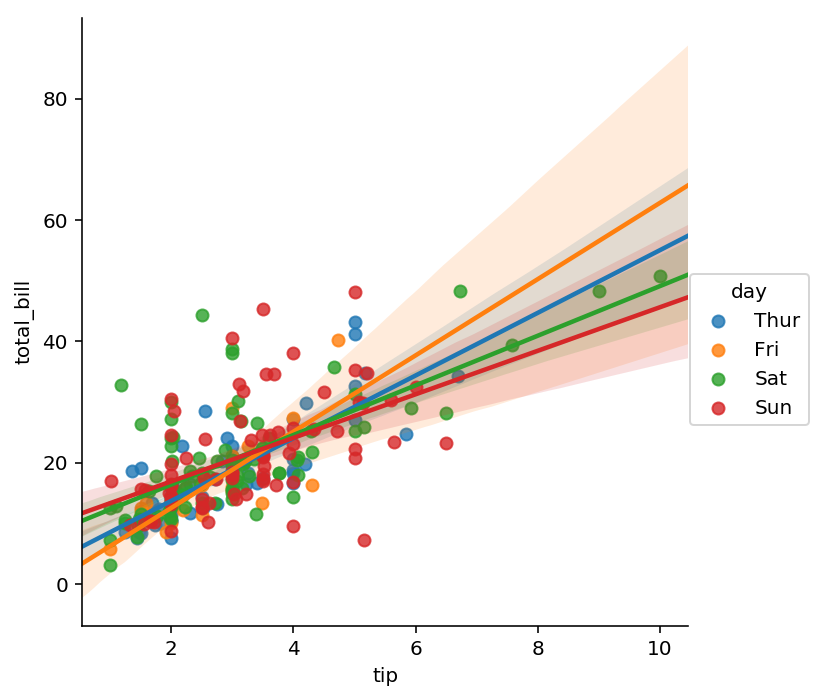

In [10]:
sns.lmplot(x='tip',y='total_bill',hue='day',data=tips)

## 알 수 있는 것
 * 토요일과 일요일에 매출이 많은 가게다

## 그럼 요일별 매출에 대해 자세히 알아봐야겠다.

In [4]:
tips['count']=1
day = tips.groupby('day').agg('sum').reset_index()
day.sort_values(by=['count'],ascending=False)

,day,total_bill,tip,size,count
2,Sat,1778.40,260.40,219,87
3,Sun,1627.16,247.39,216,76
0,Thur,1096.33,171.83,152,62
1,Fri,325.88,51.96,40,19


## 확실히 주말에 매출이 많은 걸 확인할 수 있다
## 매출이 많으니 팁이 많은건 당연하지만, 
## 한번 받을 때 평균적으로 얼마나 받는지도 살펴봐야하지 않을까?

In [24]:
day['tips per once'] = day['tip'] / day['count']
day.sort_values(by=['tips per once'],ascending=False)

,day,total_bill,tip,size,count,tips per once
3,Sun,1627.16,247.39,216,76,3.255132
2,Sat,1778.40,260.40,219,87,2.993103
0,Thur,1096.33,171.83,152,62,2.771452
1,Fri,325.88,51.96,40,19,2.734737


# 오 이런 !
## 전체 팁은 토요일에 더 많지만
## 한번 받는 팁은 일요일이 더 많다

# 여기까지 정리
   > #### 우리가 분석할 식당은 2 ~ 3명의 사람들이 가볍게 즐기는 식당이다 (확률이 높다)
   > #### 그리고 tip은 size보다 total_bill과 상관관계가 높다
   > #### 남성고객들이 팁을 조금 더 준다
   > ### 주말에 팁이 많고, 전체 팁은 토요일에, 한번은 일요일이 더 많다

----------------

## 마지막으로 time, 시간대만 남았다

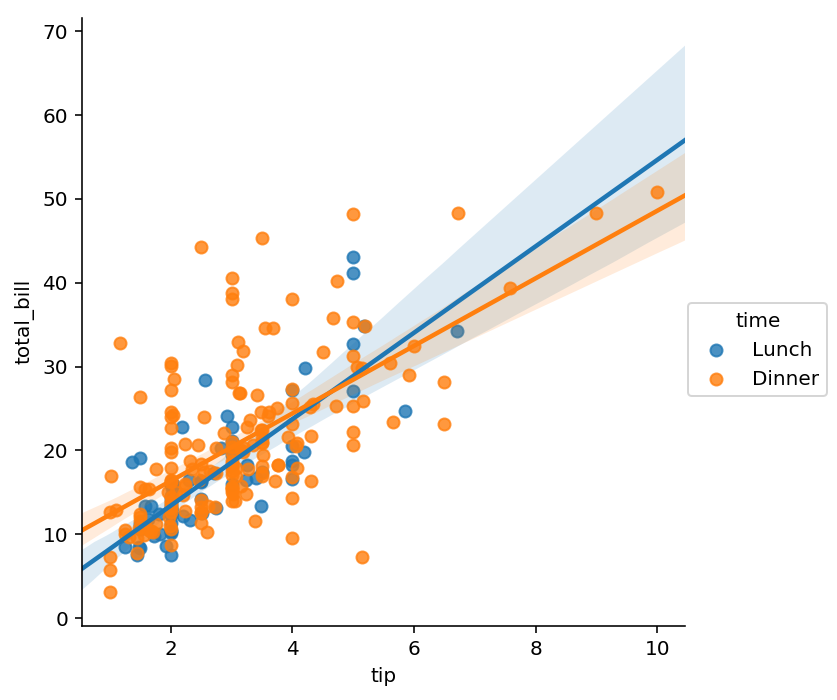

In [25]:
sns.lmplot(x='tip',y='total_bill',hue='time',data=tips)

In [26]:
time = tips.groupby('time').agg('sum').reset_index()
time.sort_values(by=['count'],ascending=False)

,time,total_bill,tip,size,count
1,Dinner,3660.30,546.07,463,176
0,Lunch,1167.47,185.51,164,68


## 알 수 있는 것
 * 이 가게는 저녁에 매출이 많다
 * 따라서 저녁에도 팁이 더 많다
 * 전체 팁, 한번 팁도 저녁이 더 많다

## 그래도 혹시 모르니 요일별 시간대를 살펴보자

In [33]:
day_time = tips.pivot_table(index=['day','time'],values=['total_bill','tip'],aggfunc=np.sum)
day_time

tip  total_bill
day  time                      
Thur Lunch   168.83     1077.55
     Dinner    3.00       18.78
Fri  Lunch    16.68       89.92
     Dinner   35.28      235.96
Sat  Lunch      NaN         NaN
     Dinner  260.40     1778.40
Sun  Lunch      NaN         NaN
     Dinner  247.39     1627.16

# 오 이런!!
## 점심대비 저녁에 많은 줄 알았는데
## 점심 데이터가 없을 뿐더러
## 심지어 매출이 가장 많은 주말에 빠져있다.
## 알 수 있는 걸 수정해야 겠다

## 알 수 있는 것
 * ~~이 가게는 저녁에 매출이 많다~~
 * ~~따라서 저녁에도 팁이 더 많다~~
 * ~~전체 팁, 한번 팁도 저녁이 더 많다~~
 * ### 절대적으론 저녁에 매출이 많지만 점심보다 더 많은진 알 수 없다

# 여기까지 정리
   > #### 우리가 분석할 식당은 2 ~ 3명의 사람들이 가볍게 즐기는 식당이다 (확률이 높다)
   > #### 그리고 tip은 size보다 total_bill과 상관관계가 높다
   > #### 남성고객들이 팁을 조금 더 준다
   > #### 주말에 팁이 많고, 전체 팁은 토요일에, 한번은 일요일이 더 많다
   > ### 저녁에 팁이 많긴 하지만 점심보다 많은진 알 수 없다

-----------------

## 분석이 끝났당
## 이 가게에 대해 요약하자면
# 2~3명의 사람들이 주말에 많이 찾고 10~20불로 가볍게 즐기는 식당이다
-----------------
### 과제를 하면서 이것저것 더 해보고 싶은 것들이 많았는데 어떻게 해야될지 몰라서 여기까지가 최선이었다
### 분석 쪽으로 부족한 점을 많이 알게 됬고 나태해지는 시점에 좋은 자극이 되는 과제였다
### 앞으로 통계, 머신러닝 공부를 더 열심히 해서 내공을 더 쌓아야겠다 